# Monte Carlo Simulação de preços de ações

In [1]:
#vamos caregar o modulo pandas
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
carteira = ['VVAR3.SA']
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = pdr.DataReader(t,data_source='yahoo',start='2015-1-1')['Adj Close']

In [8]:
#vamos criar um data frame novo com os dados de retorno em log... sabemos que em log é o melhor jeito se for ativos individuais
df_log= np.log(mdata / mdata.shift(1))
df_log.tail()

#esse codigo abaixo comentado é outro jeito de obter o msms valores, vou deixar comentato.
#caso alguem queira usado fique avontate da no msm.

#df_log = np.log(1 + mdata.pct_change())
#df_log.tail()

,VVAR3.SA
Date,
2020-03-16,-0.250285
2020-03-17,-0.071263
2020-03-18,-0.378834
2020-03-19,0.058425
2020-03-20,-0.027780


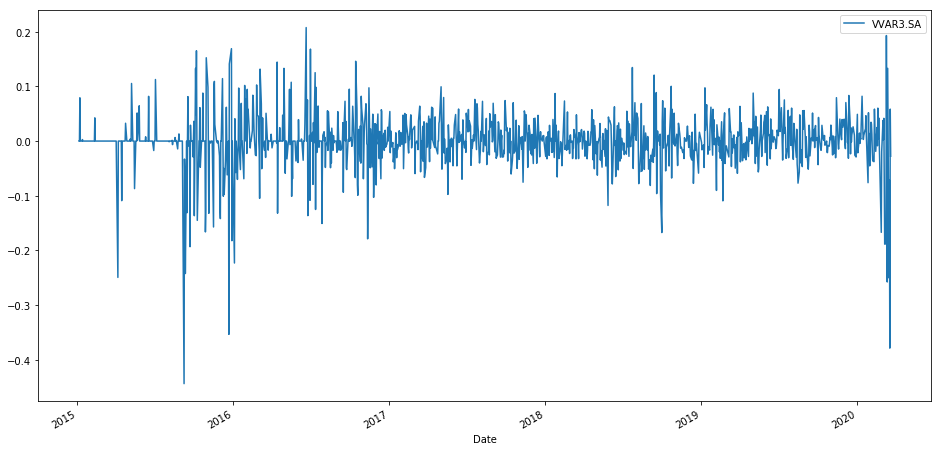

In [9]:
#vamos plot dois graficos um com o retorno logaritimo e outro com o crescimento normal
df_log.plot(figsize=(16,8))

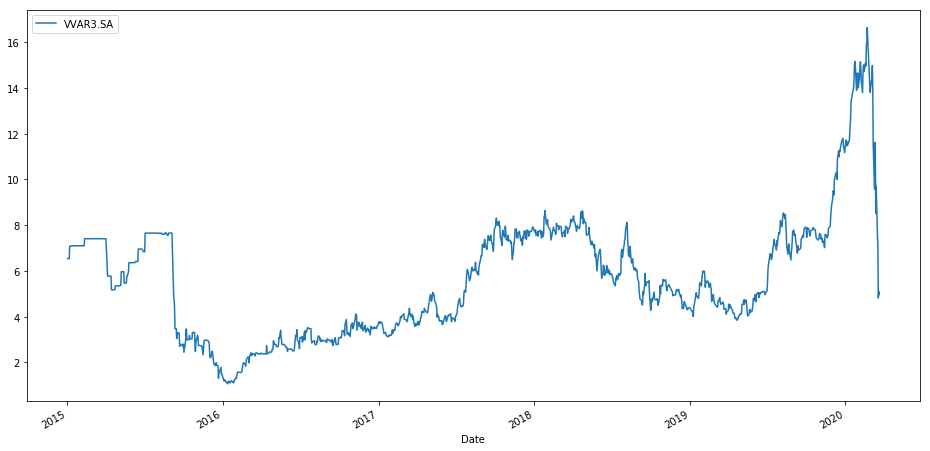

In [10]:
mdata.plot(figsize=(16,8))

In [15]:
# vaos calcular a media e a variancia dos retornos logatimos
media = df_log.mean()
media


VVAR3.SA   -0.000213
dtype: float64

In [14]:
variancia = df_log.var()
variancia

VVAR3.SA    0.002354
dtype: float64

#vamos Calcular o drift

$$
drift = u - \frac{1}{2} \cdot var
$$

In [16]:
drift = media - (0.5 * variancia)
drift

VVAR3.SA   -0.00139
dtype: float64

In [17]:
#agora vamos fazer o desvio padrao dos retorno logaritimos
stdev_retornos_log = df_log.std()
stdev_retornos_log

VVAR3.SA    0.048523
dtype: float64

In [20]:
#vamos converter a series do pandas que é a variavel drifit em uma matrix(array)
np.array(drift)

array([-0.00138979])

# oque esta aqui abaixo é apenas estudos para saber de vai dar certo Começa aqui "

In [23]:
#funçao do (scipy) par cauclaor a distancia de um evento exprexa por um nome de desvio padroes OBS: apenas para endender
# vou usar ela abaixo
norm.ppf(0.95)

1.6448536269514722

In [24]:
matrix_ale = np.random.rand(10,2)
matrix_ale

array([[0.71765437, 0.73128106],
       [0.87730762, 0.51912432],
       [0.46337573, 0.82723994],
       [0.07600032, 0.16670139],
       [0.20145237, 0.60413307],
       [0.30887691, 0.92002081],
       [0.45596813, 0.16693651],
       [0.16298461, 0.29451474],
       [0.0349414 , 0.85509442],
       [0.90015948, 0.34707722]])

In [25]:
#funçao do (scipy) par cauclaor a distancia de um evento exprexa por um nome de desvio padroes
norm.ppf(matrix_ale)

array([[ 0.57588746,  0.61669203],
       [ 1.16163254,  0.04795593],
       [-0.09193275,  0.9433144 ],
       [-1.43250048, -0.96728258],
       [-0.83644477,  0.26405978],
       [-0.49903629,  1.40521156],
       [-0.11059659, -0.9663421 ],
       [-0.98226518, -0.54024298],
       [-1.81266952,  1.05853598],
       [ 1.28246081, -0.39322347]])

In [27]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.15801871,  0.70661977],
       [ 1.53700694,  0.87834432],
       [ 0.37265118, -0.47873774],
       [-1.76415013, -1.075991  ],
       [-0.58856589, -0.79320505],
       [ 0.47972234, -1.58222607],
       [-1.66141475,  0.58014615],
       [-1.04950222, -0.92165719],
       [ 0.52902691,  0.37474628],
       [-0.84651113,  0.1926369 ]])

# termina aqui "

In [28]:
#agora vamos criar os argumentos para interçao e os intrvalso em dias(até quando eu quero os futuros preços)
tempo_intervalos = 1000
interacao = 10

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br \>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [29]:
retornos_diarios = np.exp(drift.values + stdev_retornos_log.values * norm.ppf(np.random.rand(tempo_intervalos, interacao)))
retornos_diarios

array([[1.00863873, 0.96933251, 0.92143311, ..., 0.98617163, 1.00601013,
        0.94668908],
       [1.05904664, 0.96032654, 1.02733654, ..., 1.04321914, 1.01014669,
        0.98940971],
       [1.02593528, 0.91723236, 0.92245691, ..., 1.02617394, 1.01071611,
        0.97062577],
       ...,
       [0.99627379, 1.02920107, 0.9458259 , ..., 0.96054251, 1.06561138,
        1.02439971],
       [1.00716603, 1.03177767, 1.08438185, ..., 0.93260997, 1.00782583,
        0.95107716],
       [1.0154176 , 0.88848451, 1.04348435, ..., 1.00720334, 0.91081432,
        1.04518081]])

In [30]:
#agora vamos pegar o valor do preço de partida, por logica vamos usar o ultimo valor da data atual.
preco_par_inicial =  mdata.iloc[-1]
preco_par_inicial

VVAR3.SA    4.97
Name: 2020-03-20 00:00:00, dtype: float64

In [32]:
#vamos cria uma matriz como o msm tamanho de nossa matriz de retornos diarios
#vamos umsar uma funcção do pandas que ja faz isso rapido para noix e ja coloca o valor zerados
lista_de_precos = np.zeros_like(retornos_diarios)
lista_de_precos

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
#apenas testei para saber se iria nas possiçoes corretas 
lista_de_precos[0] = preco_par_inicial
lista_de_precos

array([[ 4.96999979,  4.96999979,  4.96999979, ...,  4.96999979,
         4.96999979,  4.96999979],
       [ 5.26346156,  4.77282272,  5.10586237, ...,  5.18479889,
         5.02042885,  4.91736605],
       [ 5.39997093,  4.37778745,  4.70993802, ...,  5.32050553,
         5.07422831,  4.77292218],
       ...,
       [ 7.69345546,  0.58439768,  0.05573861, ...,  0.53145079,
         2.34779396, 36.77577264],
       [ 7.74858697,  0.60296848,  0.06044194, ...,  0.49563631,
         2.3661674 , 34.97659742],
       [ 7.86805161,  0.53572815,  0.06307022, ...,  0.49920655,
         2.15513914, 36.55686851]])

In [45]:
#vamos zubstituir o zeros pelos valores com os reotrnos diarios
#usando um for
for t in range(1, tempo_intervalos):
        lista_de_precos[t] = lista_de_precos[t-1]*retornos_diarios[t]

        
lista_de_precos        

array([[ 4.96999979,  4.96999979,  4.96999979, ...,  4.96999979,
         4.96999979,  4.96999979],
       [ 5.26346156,  4.77282272,  5.10586237, ...,  5.18479889,
         5.02042885,  4.91736605],
       [ 5.39997093,  4.37778745,  4.70993802, ...,  5.32050553,
         5.07422831,  4.77292218],
       ...,
       [ 7.69345546,  0.58439768,  0.05573861, ...,  0.53145079,
         2.34779396, 36.77577264],
       [ 7.74858697,  0.60296848,  0.06044194, ...,  0.49563631,
         2.3661674 , 34.97659742],
       [ 7.86805161,  0.53572815,  0.06307022, ...,  0.49920655,
         2.15513914, 36.55686851]])

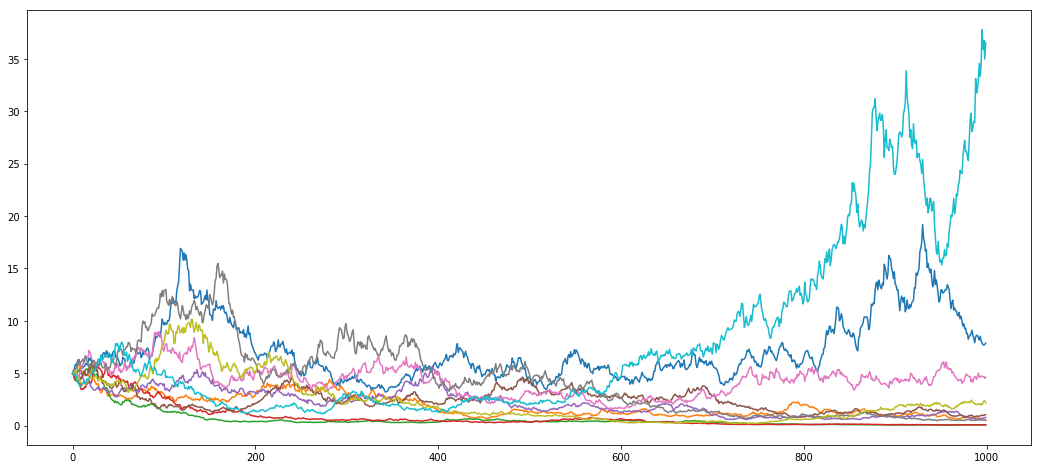

In [50]:
#agora só por num grafico para ficar vizual como serio os preços dessa ação nos proximo 1000 dias
plt.figure(figsize=(18,8))
plt.plot(lista_de_precos)